In [66]:
import pandas as pd
from sklearn.datasets import load_iris

In [67]:
iris = load_iris()

In [68]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(iris.feature_names)
df = df.drop(["sepal length (cm)", "sepal width (cm)"], axis=1)
df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


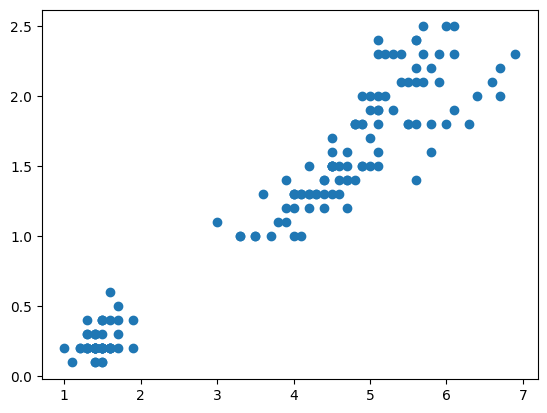

In [69]:
import matplotlib.pyplot as plt
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [70]:
from sklearn.cluster import KMeans

k_rng = range(1,10)

scores = []
for i in k_rng:
    model = KMeans(i)
    model.fit(df[['petal length (cm)', 'petal width (cm)']])
    scores.append(model.inertia_)


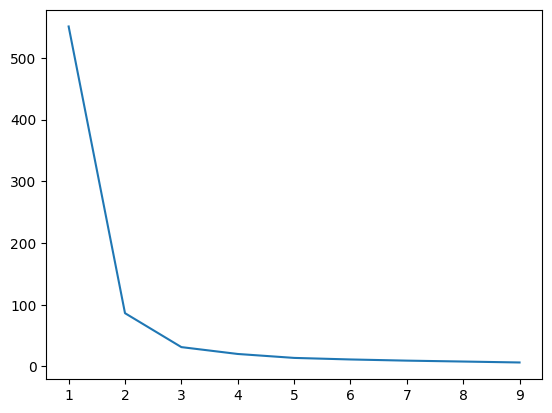

In [71]:
plt.plot(k_rng, scores)

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['pl_scaled'] = scaler.fit_transform(df[['petal length (cm)']])
print(scaler.scale_, scaler.data_min_)
pl_scale = scaler.scale_
pl_offset = scaler.data_min_
df['pw_scaled'] = scaler.fit_transform(df[['petal width (cm)']])
print(scaler.scale_, scaler.data_min_)
pw_scale = scaler.scale_
pw_offset = scaler.data_min_
df

[0.16949153] [1.]
[0.41666667] [0.1]


,petal length (cm),petal width (cm),target,pl_scaled,pw_scaled,predicted
0,1.4,0.2,0,0.067797,0.041667,1
1,1.4,0.2,0,0.067797,0.041667,1
2,1.3,0.2,0,0.050847,0.041667,1
3,1.5,0.2,0,0.084746,0.041667,1
4,1.4,0.2,0,0.067797,0.041667,1
...,...,...,...,...,...,...
145,5.2,2.3,2,0.711864,0.916667,2
146,5.0,1.9,2,0.677966,0.750000,2
147,5.2,2.0,2,0.711864,0.791667,2
148,5.4,2.3,2,0.745763,0.916667,2


In [111]:
model = KMeans(n_clusters=3)
df['predicted'] = model.fit_predict(df[['pl_scaled', 'pw_scaled']])
model.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [112]:
df1 = df[df['predicted'] == 0]
df2 = df[df['predicted'] == 1]
df3 = df[df['predicted'] == 2]

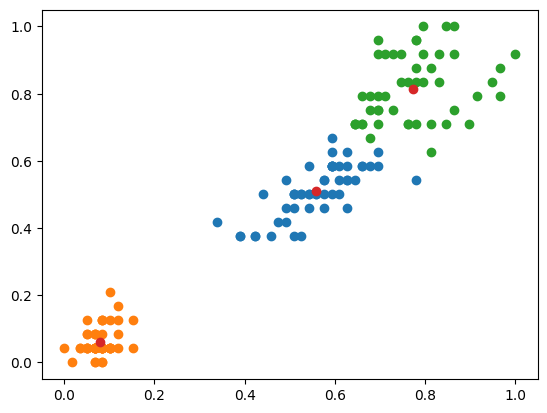

In [113]:
plt.scatter(df1['pl_scaled'], df1['pw_scaled'])
plt.scatter(df2['pl_scaled'], df2['pw_scaled'])
plt.scatter(df3['pl_scaled'], df3['pw_scaled'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1])

In [114]:
print(model.cluster_centers_[:,0] / pl_scale)
print(model.cluster_centers_[:,0])
print(model.cluster_centers_[:,1] / pw_scale)
print(model.cluster_centers_[:,1])

[3.29615385 0.462      4.56666667]
[0.55867014 0.07830508 0.7740113 ]
[1.225   0.146   1.95625]
[0.51041667 0.06083333 0.81510417]


[4.29615385 1.462      5.56666667] [1.325   0.246   2.05625]


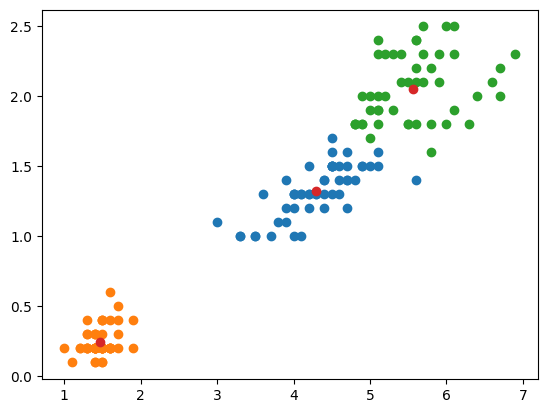

In [116]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'])
plt.scatter(model.cluster_centers_[:,0] / pl_scale + pl_offset, model.cluster_centers_[:,1] / pw_scale + pw_offset)

print(model.cluster_centers_[:,0] / pl_scale + pl_offset, model.cluster_centers_[:,1] / pw_scale + pw_offset)